In [13]:
import pandas as pd

In [3]:
!python -V

Python 3.12.7


In [14]:
df = pd.read_excel(r"galutinis_nenormalizuotas - Copy.xlsx", index_col= 0)

In [ ]:
# possible to drop the most extreme clients
#df.drop([40, 37, 97], axis=1, inplace=True)

In [136]:
# z-score normalization using the whole dataset
#global_mean = df.values.mean()
#global_std = df.values.std()

#df = (df - global_mean) / global_std

In [ ]:
# z-score normalization for ech client seperately

#df = (df - df.mean()) / df.std()

C:\Users\Roland\AppData\Local\Temp\ipykernel_8128\533698130.py:27: DeprecationWarning: The BSpline class is deprecated. Use BSplineBasis instead.
  basis = BSpline(n_basis=25)


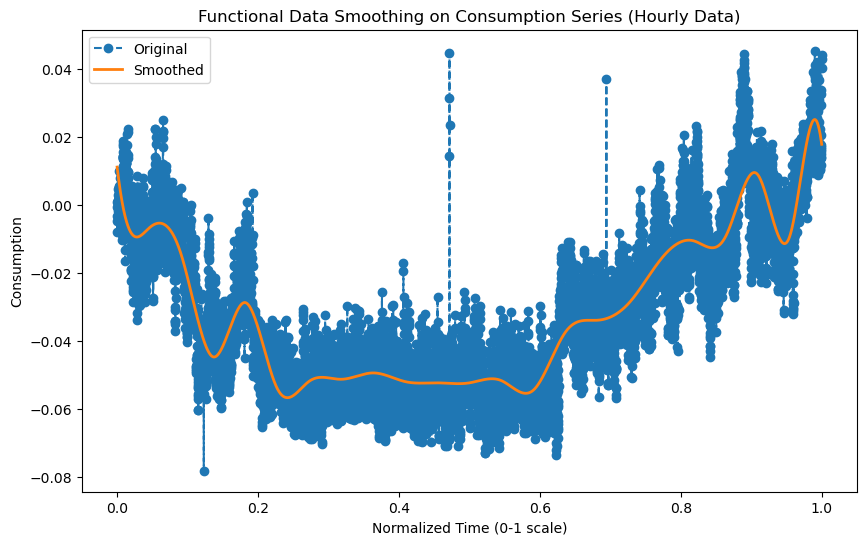

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfda
from skfda.representation.basis import BSpline
from skfda.preprocessing.smoothing import BasisSmoother

# Assume your DataFrame 'df' is already loaded and its index contains hourly datetime values.

# Extract consumption columns (all columns except the last two: price and temperature)
consumption_cols = df.columns[:-2]

# Convert the datetime index to hours since the start.
# Compute the difference in hours between each timestamp and the first timestamp.
time_numeric = (df.index - df.index[0]).total_seconds() / 3600.0
# Normalize time to [0, 1] for numerical stability in smoothing
time_grid = time_numeric / time_numeric.max()

# Build the data matrix: each row corresponds to a consumption time series.
# The shape will be (number of consumption series, number of time points)
data_matrix = np.array([df[col].values for col in consumption_cols])

# Create a functional data grid object.
fd = skfda.FDataGrid(data_matrix=data_matrix, grid_points=time_grid)

# Define a B-spline basis for smoothing. Adjust n_basis as needed.
basis = BSpline(n_basis=25)

# Set up the smoother using basis expansion.
smoother = BasisSmoother(basis=basis)

# Fit the smoother and transform the data.
fd_smooth = smoother.fit_transform(fd)

# Plot one of the consumption series to compare the original and smoothed data.
plt.figure(figsize=(10, 6))
# Plot the first consumption series (index 0) as an example.
plt.plot(time_grid, data_matrix[0], label='Original', marker='o', linestyle='--')
plt.plot(time_grid, fd_smooth.data_matrix[0].flatten(), label='Smoothed', linewidth=2)
plt.xlabel('Normalized Time (0-1 scale)')
plt.ylabel('Consumption')
plt.title('Functional Data Smoothing on Consumption Series (Hourly Data)')
plt.legend()
plt.show()


In [126]:
data_matrix

array([[0.69716  , 0.683305 , 0.70617  , ..., 0.939293 , 0.94457  ,
        0.923671 ],
       [1.437203 , 1.411782 , 1.448464 , ..., 1.563621 , 1.492173 ,
        1.542192 ],
       [0.383397 , 0.382603 , 0.382275 , ..., 0.373107 , 0.373852 ,
        0.372826 ],
       ...,
       [0.091875 , 0.088936 , 0.08199  , ..., 0.154941 , 0.152115 ,
        0.141924 ],
       [0.0919556, 0.088138 , 0.0835784, ..., 0.13272  , 0.128445 ,
        0.116013 ],
       [0.115375 , 0.079209 , 0.083037 , ..., 0.089578 , 0.091433 ,
        0.114882 ]])

C:\Users\Roland\AppData\Local\Temp\ipykernel_34920\2987322012.py:35: DeprecationWarning: The Fourier class is deprecated. Use FourierBasis instead.
  basis = Fourier(domain_range=(0, 1), n_basis=30)


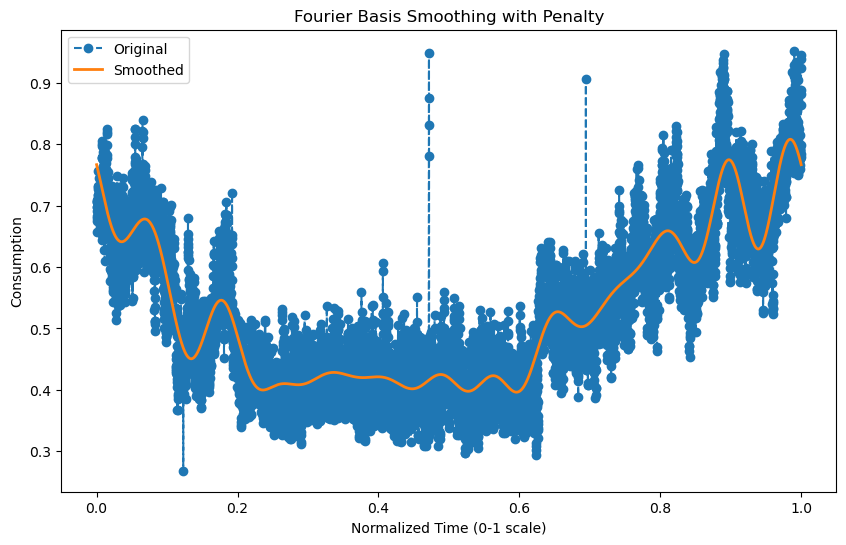

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfda
from skfda.representation.basis import BSpline, Fourier
from skfda.preprocessing.smoothing import BasisSmoother

# Assume your DataFrame 'df' is already loaded, and its index contains hourly datetime values over one year.


# Extract consumption columns (all columns except the last two: price and temperature)
consumption_cols = df.columns[:-2]

# Convert the datetime index to hours since the start.
time_numeric = (df.index - df.index[0]).total_seconds() / 3600.0
# Normalize time to [0, 1] for numerical stability in smoothing
time_grid = time_numeric / time_numeric.max()

# Build the data matrix: each row corresponds to a consumption time series.
# The shape will be (number of consumption series, number of time points)
data_matrix = np.array([df[col].values for col in consumption_cols])

# Create a functional data grid object.
fd = skfda.FDataGrid(data_matrix=data_matrix, grid_points=time_grid)

# Choose a basis for smoothing.
# Option 1: Use a B-spline basis (adjust n_basis as needed)
#basis = BSpline(n_basis=30)

# Option 2: Use a Fourier basis to capture seasonal (periodic) behavior
lambda_value = 1e-2  # This is your penalty weight.

# Create a Fourier basis for smoothing.
# The domain_range is set to (0, 1) because our time grid is normalized.
basis = Fourier(domain_range=(0, 1), n_basis=30)

# Set up the smoother, including the penalty via smoothing_parameter.
smoother = BasisSmoother(basis=basis, smoothing_parameter=lambda_value)

# Fit the smoother and transform the data.
fd_smooth = smoother.fit_transform(fd)

# Plot one of the consumption series to compare original vs. smoothed data.
plt.figure(figsize=(10, 6))
plt.plot(time_grid, data_matrix[0], label='Original', marker='o', linestyle='--')
plt.plot(time_grid, fd_smooth.data_matrix[0].squeeze(), label='Smoothed', linewidth=2)
plt.xlabel('Normalized Time (0-1 scale)')
plt.ylabel('Consumption')
plt.title('Fourier Basis Smoothing with Penalty')
plt.legend()

plt.savefig('fourierSmoothing.png')
plt.show()

C:\Users\Roland\AppData\Local\Temp\ipykernel_8128\1589958093.py:20: DeprecationWarning: The Fourier class is deprecated. Use FourierBasis instead.
  basis = Fourier(domain_range=(0, 1), n_basis=n_basis)


n_basis: 5, MSE: 0.0631
n_basis: 10, MSE: 0.0603
n_basis: 15, MSE: 0.0592
n_basis: 20, MSE: 0.0581
n_basis: 25, MSE: 0.0573
n_basis: 30, MSE: 0.0566
n_basis: 35, MSE: 0.0563
n_basis: 40, MSE: 0.0559
n_basis: 45, MSE: 0.0557
n_basis: 50, MSE: 0.0555

Best n_basis based on reconstruction error: 50


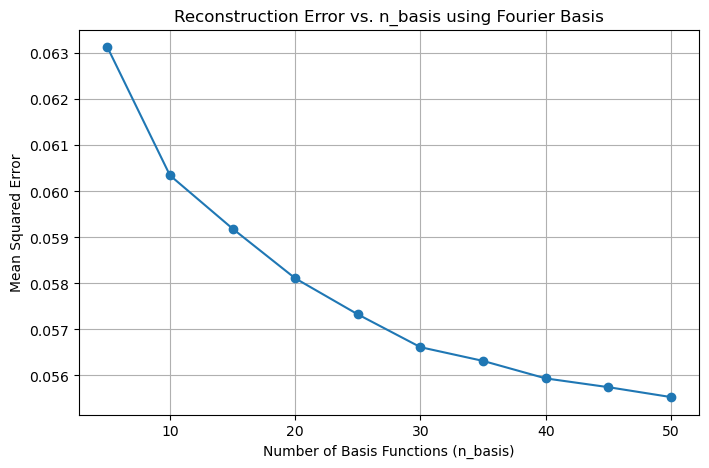

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from skfda.representation.basis import Fourier
from skfda.preprocessing.smoothing import BasisSmoother

# Assume you have already created:
# - `data_matrix`: a NumPy array of shape (n_series, n_time_points) with your consumption data.
# - `time_grid`: a normalized time grid (values between 0 and 1).
# - `fd`: an FDataGrid object created as:
#       fd = skfda.FDataGrid(data_matrix=data_matrix, grid_points=time_grid)

# Define candidate values for n_basis.
# Note: Fourier bases generally work well with an even number of basis functions,
# but here we demonstrate with a simple candidate range.
n_basis_candidates = range(5, 51, 5)  # For example: 5, 10, 15, 20, 25, 30
errors = []

for n_basis in n_basis_candidates:
    # Create a Fourier basis with the current number of basis functions.
    basis = Fourier(domain_range=(0, 1), n_basis=n_basis)
    
    # Set up the smoother using the Fourier basis.
    smoother = BasisSmoother(basis=basis)
    
    # Smooth the functional data.
    fd_smooth = smoother.fit_transform(fd)
    
    # The smoothed data is stored as a 3D array with shape (n_series, 1, n_time_points).
    # We squeeze it to get a 2D array of shape (n_series, n_time_points).
    smoothed_values = fd_smooth.data_matrix.squeeze()
    
    # Calculate the mean squared error between the original and the smoothed data.
    mse = np.mean((data_matrix - smoothed_values) ** 2)
    errors.append(mse)
    print(f"n_basis: {n_basis}, MSE: {mse:.4f}")

# Identify the best n_basis (the one with the minimum error)
best_n_basis = n_basis_candidates[np.argmin(errors)]
print("\nBest n_basis based on reconstruction error:", best_n_basis)

# Plot reconstruction error vs. n_basis
plt.figure(figsize=(8, 5))
plt.plot(list(n_basis_candidates), errors, marker='o')
plt.xlabel('Number of Basis Functions (n_basis)')
plt.ylabel('Mean Squared Error')
plt.title('Reconstruction Error vs. n_basis using Fourier Basis')
plt.grid(True)
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12948\3033386617.py:18: DeprecationWarning: The BSpline class is deprecated. Use BSplineBasis instead.
  basis = BSpline(n_basis=n_basis)


n_basis: 5, MSE: 0.1274
n_basis: 10, MSE: 0.1196
n_basis: 15, MSE: 0.1166
n_basis: 20, MSE: 0.1153
n_basis: 25, MSE: 0.1127
n_basis: 30, MSE: 0.1124

Best n_basis based on reconstruction error: 30


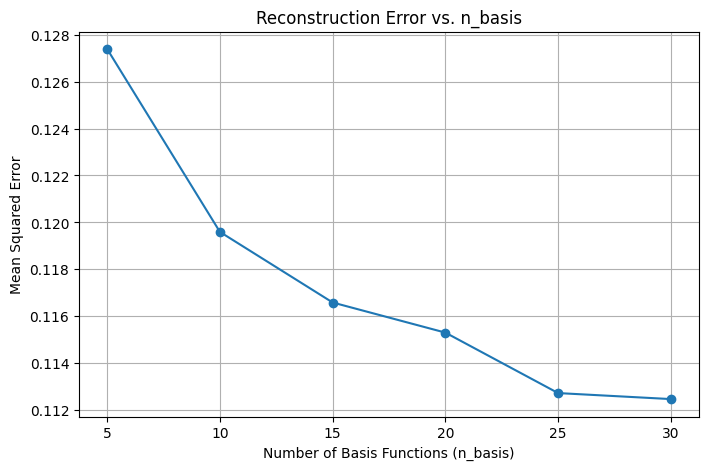

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skfda.representation.basis import BSpline
from skfda.preprocessing.smoothing import BasisSmoother

# Assume you have already created:
# - `data_matrix`: a NumPy array of shape (n_series, n_time_points) with your consumption data.
# - `time_grid`: a normalized time grid (values between 0 and 1).
# - `fd`: an FDataGrid object created as:
#      fd = skfda.FDataGrid(data_matrix=data_matrix, grid_points=time_grid)

# Define candidate values for n_basis
n_basis_candidates = range(5, 31, 5)  # for example, 5, 10, 15, 20, 25, 30
errors = []

for n_basis in n_basis_candidates:
    # Create a B-spline basis with the current number of basis functions.
    basis = BSpline(n_basis=n_basis)
    
    # Set up the smoother.
    smoother = BasisSmoother(basis=basis)
    
    # Smooth the functional data.
    fd_smooth = smoother.fit_transform(fd)
    
    # The smoothed data is stored as a 3D array with shape (n_series, 1, n_time_points).
    # We squeeze it to get a 2D array of shape (n_series, n_time_points).
    smoothed_values = fd_smooth.data_matrix.squeeze()
    
    # Calculate the mean squared error between the original and the smoothed data.
    mse = np.mean((data_matrix - smoothed_values)**2)
    errors.append(mse)
    print(f"n_basis: {n_basis}, MSE: {mse:.4f}")

# Identify the best n_basis (the one with minimum error)
best_n_basis = n_basis_candidates[np.argmin(errors)]
print("\nBest n_basis based on reconstruction error:", best_n_basis)

# Plot reconstruction error vs. n_basis
plt.figure(figsize=(8, 5))
plt.plot(list(n_basis_candidates), errors, marker='o')
plt.xlabel('Number of Basis Functions (n_basis)')
plt.ylabel('Mean Squared Error')
plt.title('Reconstruction Error vs. n_basis')
plt.grid(True)
plt.show()


### c) Covariance surface/matrix

Time is a bit weird for our dataset, because we have the end of one winter, and the start of the next one. Because of this, the covariance surface for Winter is done seperately, because we needed to combine the data points.

In [17]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

In [18]:
season_series = df.index.to_series().dt.month.map(month_to_season)

# Define the seasons to analyze
seasons = ['Autumn']

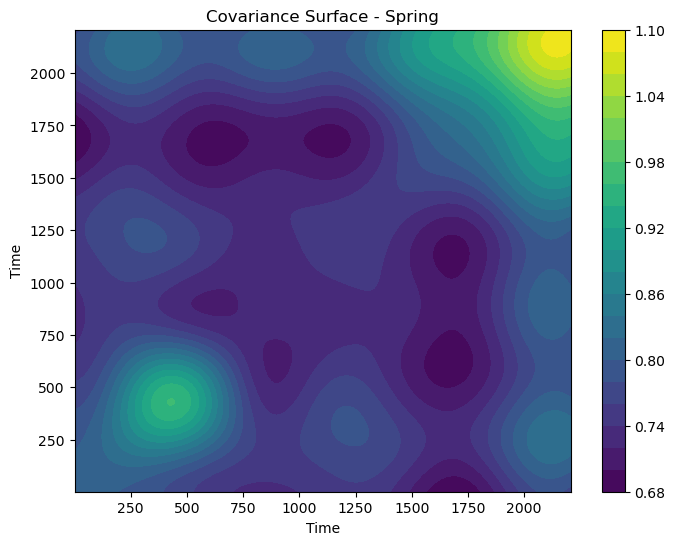

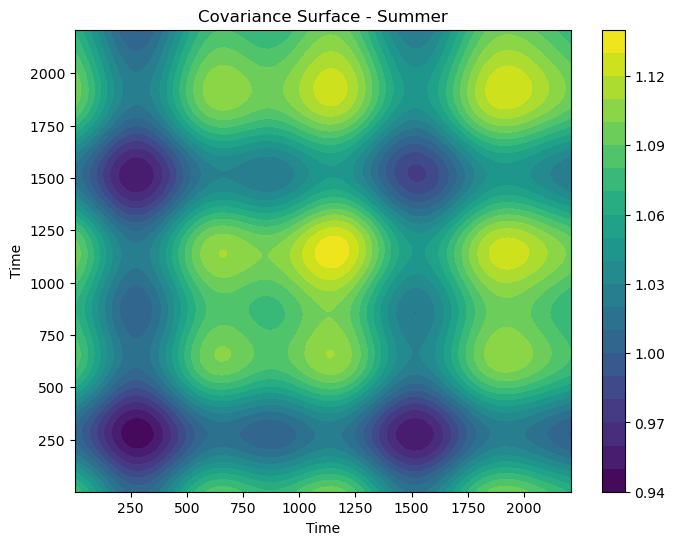

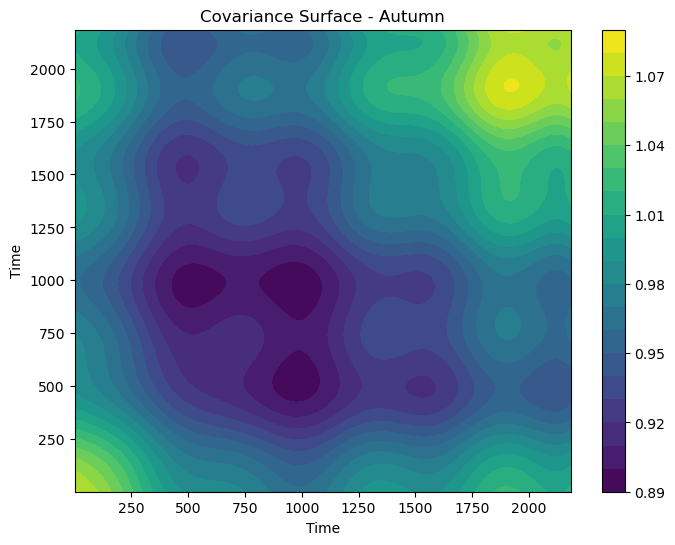

In [20]:
for season in seasons:
    # Find indices in the time grid that belong to the current season
    idx_season = np.where(season_series == season)[0]
    if len(idx_season) == 0:
        continue  # Skip if no data for the season

    # Create a relative time axis that starts at 1
    time_season_relative = np.arange(1, len(idx_season) + 1)
    
    # Extract the smoothed data for the season.
    # Here, we assume the shape is (n_clients, n_time_points, 1)
    data_season = fd_smooth.data_matrix[:, idx_season, 0]

    # Compute the empirical covariance surface:
    # np.cov with rowvar=False treats each column as a variable.
    cov_matrix = np.cov(data_season, rowvar=False)

    # Create a meshgrid using the relative time axis.
    X, Y = np.meshgrid(time_season_relative, time_season_relative)

    plt.figure(figsize=(8, 6))
    cp = plt.contourf(X, Y, cov_matrix, levels=20)
    plt.title(f'Covariance Surface - {season}')
    plt.xlabel('Time')
    plt.ylabel('Time')
    plt.colorbar(cp)
    plt.savefig('Autumn_cov.png')
    plt.show()

In [147]:
idx_winter = np.where(season_series == 'Winter')[0]
time_winter = np.arange(len(idx_winter))
data_winter = fd_smooth.data_matrix[:, idx_season, 0]
cov_winter = np.cov(data_winter, rowvar=False)

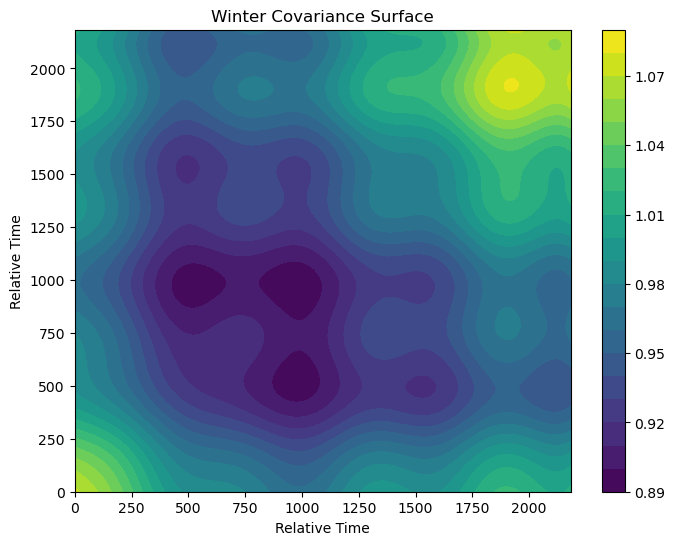

In [148]:
X, Y = np.meshgrid(time_winter, time_winter)
plt.figure(figsize=(8, 6))
cp = plt.contourf(X, Y, cov_winter, levels=20)
plt.title('Winter Covariance Surface')
plt.xlabel('Relative Time')
plt.ylabel('Relative Time')
plt.colorbar(cp)
plt.show()

Here we have our covariance surfaces. The yellowish parts are when the clients covary at that specific time by consumpion. For example we can see that at the start of Autumn and at the End of Autumn, the consumption covaries across all clients, while at the middle of the season the consumption varies more across the clients.

In summary, this covariance surface reveals when (in Autumn) energy usage is more or less in sync across your clients.

Summer looks a bit different from others. 

### d) Accelaration and Slope

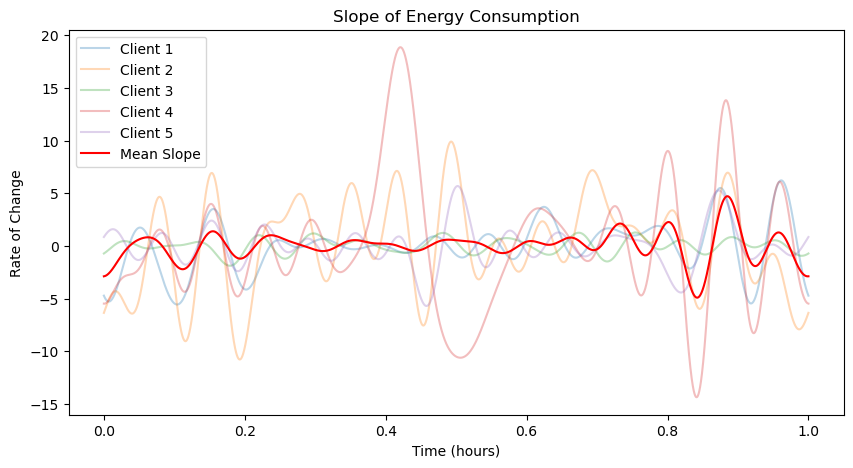

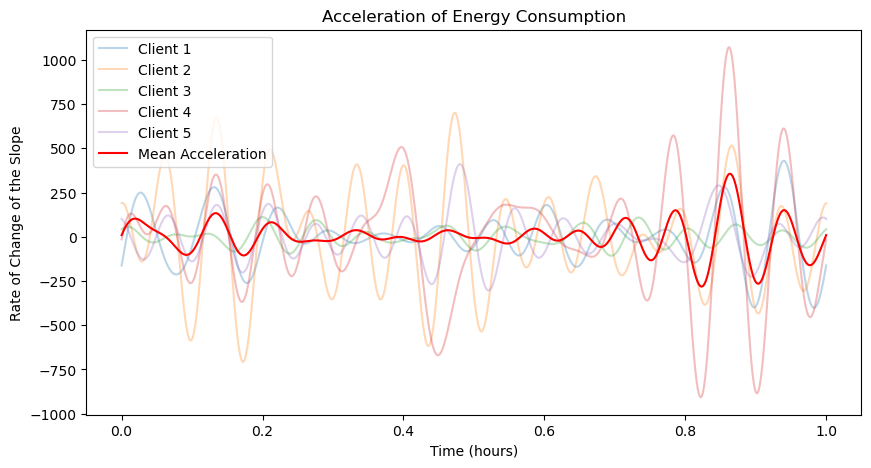

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Compute the first and second derivatives
fd_slope = fd_smooth.derivative(order=1)      # slope
fd_accel = fd_smooth.derivative(order=2)      # acceleration

# 2. Extract the time grid (assuming FDataGrid with shape (n_clients, n_points))
time_grid = fd_smooth.grid_points[0]  # scikit-fda stores the 1D time grid in a list

import matplotlib.pyplot as plt

# 1. Compute the mean of the smoothed data
fd_mean = fd_smooth.mean()

# fd_mean is now a single functional data object (shape often (1, n_points))
# 2.1 Slope (First Derivative)
fd_mean_slope = fd_mean.derivative(order=1)

# 2.2 Acceleration (Second Derivative)
fd_mean_accel = fd_mean.derivative(order=2)

# Extract the time grid
time_grid = fd_smooth.grid_points[0]  # scikit-fda stores the time points in a list


# 3. Plot the slope for a few clients
plt.figure(figsize=(10, 5))
for i in range(5):  # plot first 5 clients
    plt.plot(time_grid, fd_slope.data_matrix[i, :, 0], label=f'Client {i+1}', alpha = 0.3)
plt.plot(time_grid, fd_mean_slope.data_matrix[0, :, 0], label='Mean Slope', color = 'red')
plt.title('Slope of Energy Consumption')
plt.xlabel('Time (hours)')
plt.ylabel('Rate of Change')
plt.legend()
plt.savefig('slope.png')
plt.show()

# 4. Plot the acceleration for the same clients
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.plot(time_grid, fd_accel.data_matrix[i, :, 0], label=f'Client {i+1}', alpha = 0.3)
plt.plot(time_grid, fd_mean_accel.data_matrix[0, :, 0], label='Mean Acceleration', color = 'red')
plt.title('Acceleration of Energy Consumption')
plt.xlabel('Time (hours)')
plt.ylabel('Rate of Change of the Slope')
plt.legend()
plt.savefig('accelaration.png')
plt.show()

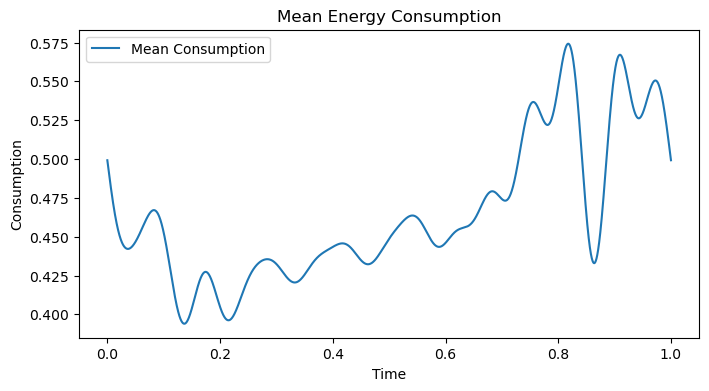

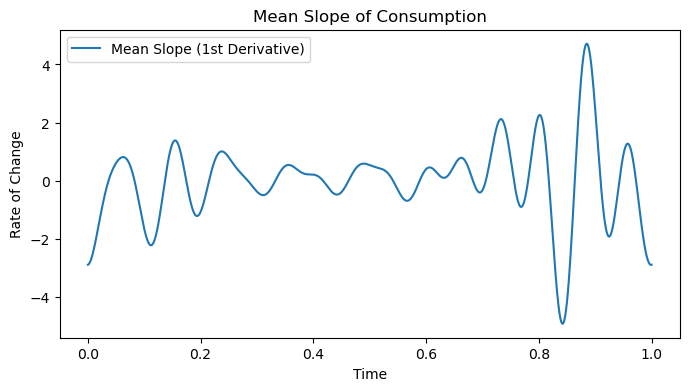

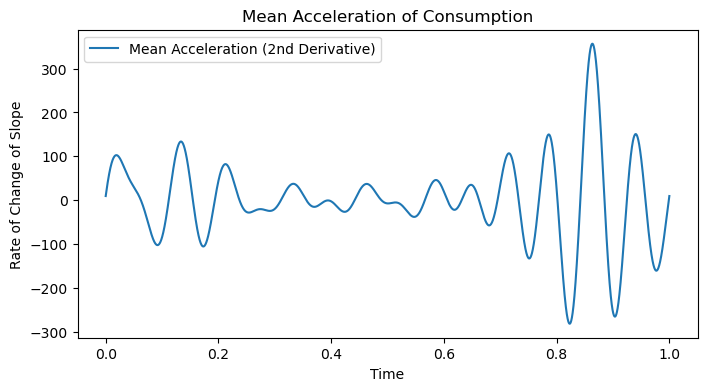

In [150]:
import matplotlib.pyplot as plt

# 1. Compute the mean of the smoothed data
fd_mean = fd_smooth.mean()

# fd_mean is now a single functional data object (shape often (1, n_points))
# 2.1 Slope (First Derivative)
fd_mean_slope = fd_mean.derivative(order=1)

# 2.2 Acceleration (Second Derivative)
fd_mean_accel = fd_mean.derivative(order=2)

# Extract the time grid
time_grid = fd_smooth.grid_points[0]  # scikit-fda stores the time points in a list

# Plot the mean function
plt.figure(figsize=(8, 4))
plt.plot(time_grid, fd_mean.data_matrix[0, :, 0], label='Mean Consumption')
plt.title('Mean Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()
plt.show()

# Plot the slope
plt.figure(figsize=(8, 4))
plt.plot(time_grid, fd_mean_slope.data_matrix[0, :, 0], label='Mean Slope (1st Derivative)')
plt.title('Mean Slope of Consumption')
plt.xlabel('Time')
plt.ylabel('Rate of Change')
plt.legend()
plt.show()

# Plot the acceleration
plt.figure(figsize=(8, 4))
plt.plot(time_grid, fd_mean_accel.data_matrix[0, :, 0], label='Mean Acceleration (2nd Derivative)')
plt.title('Mean Acceleration of Consumption')
plt.xlabel('Time')
plt.ylabel('Rate of Change of Slope')
plt.legend()
plt.show()

Here again we see bigger spikes around winter times. This is probably expected since during winter times the energy consumption can definitely be more irregular based on the time (night/day, weather etc..).

Maybe we can try increasing the nbasis number. 30 looks good but maybe >30 would better capture the day-to-day differences. With nbasis = 30 and Fourier we are mostly just capturing the seasonal changes.

Also, when using Bspline instead of Fourier, the graphs are drastically different. I would say more calm with much bigger spikes at the start of our timeline and end of our timeline.

### PCA

Here we can create FPCA with 10 components and draw a scree plot to see the optimal Components number - in our case it looks like 3.

Explained variance ratio by component: [9.37578595e-01 2.86297169e-02 2.32844705e-02 4.02712990e-03
 1.57700760e-03 1.25584350e-03 7.13403221e-04 6.37059709e-04
 3.71226812e-04 2.92657549e-04]
Cumulative variance ratio: [0.93757859 0.96620831 0.98949278 0.99351991 0.99509692 0.99635276
 0.99706617 0.99770323 0.99807445 0.99836711]


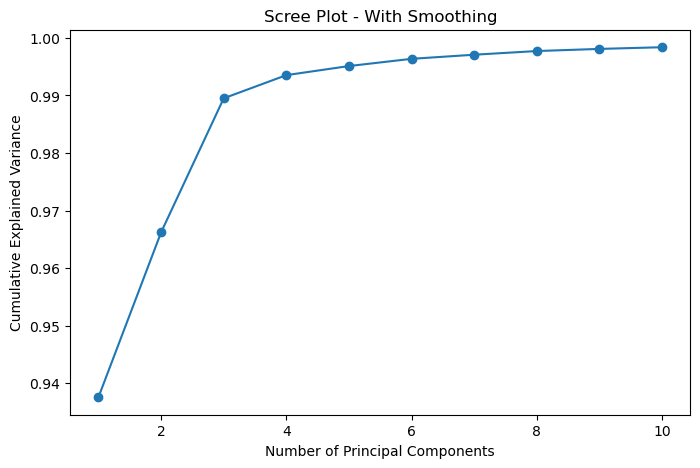

In [28]:
import numpy as np
from skfda.preprocessing.dim_reduction.feature_extraction import FPCA
import matplotlib.pyplot as plt

n_components = 10
fpca = FPCA(n_components=n_components)
fpca.fit(fd_smooth)

var_ratio = fpca.explained_variance_ratio_
cum_var_ratio = np.cumsum(var_ratio)

print("Explained variance ratio by component:", var_ratio)
print("Cumulative variance ratio:", cum_var_ratio)

plt.figure(figsize=(8, 5))
plt.plot(range(1, n_components+1), cum_var_ratio, marker='o')
plt.title("Scree Plot - With Smoothing")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.savefig('scree_smooth.png')
plt.show()

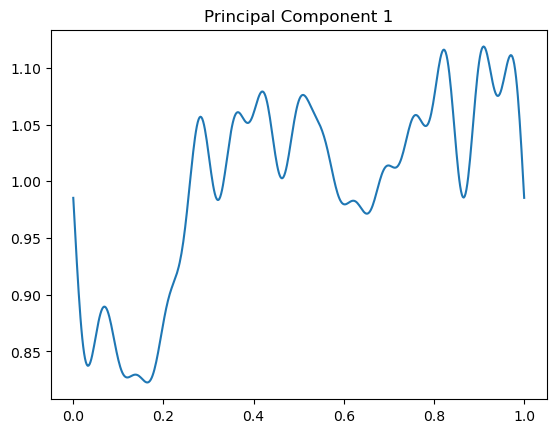

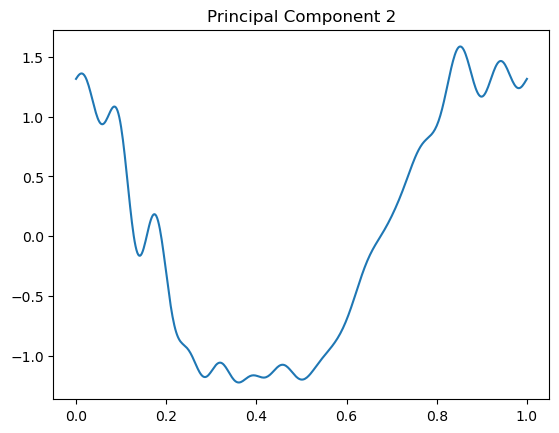

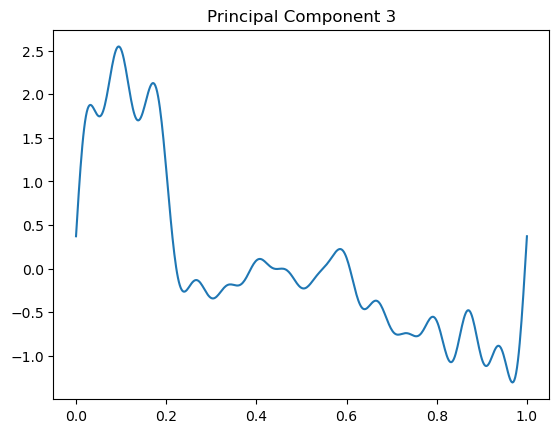

In [25]:
for i, comp in enumerate(fpca.components_[:3], start=1):
    comp.plot()
    plt.title(f"Principal Component {i}")
    plt.savefig(f"pca_{i}.png")
    plt.show()

These different components might be indicating things like weekday vs weekend, morning vs night etc.. Will need to think about possible interpretations

Maybe a good idea would be too also do PCA without smoothing. This way we can see how much smoothing helps.

Explained variance ratio by component: [8.78423560e-01 4.43746190e-02 2.79497664e-02 1.31458373e-02
 7.93406674e-03 5.43817566e-03 4.04520974e-03 2.27428794e-03
 1.49766418e-03 1.31215725e-03 1.11569946e-03 8.58212257e-04
 8.19860683e-04 6.36498978e-04 6.13330805e-04 5.88947144e-04
 5.13042036e-04 4.80518251e-04 4.11894686e-04 3.78999565e-04]
Cumulative variance ratio: [0.87842356 0.92279818 0.95074795 0.96389378 0.97182785 0.97726603
 0.98131123 0.98358552 0.98508319 0.98639534 0.98751104 0.98836926
 0.98918912 0.98982562 0.99043895 0.99102789 0.99154094 0.99202145
 0.99243335 0.99281235]


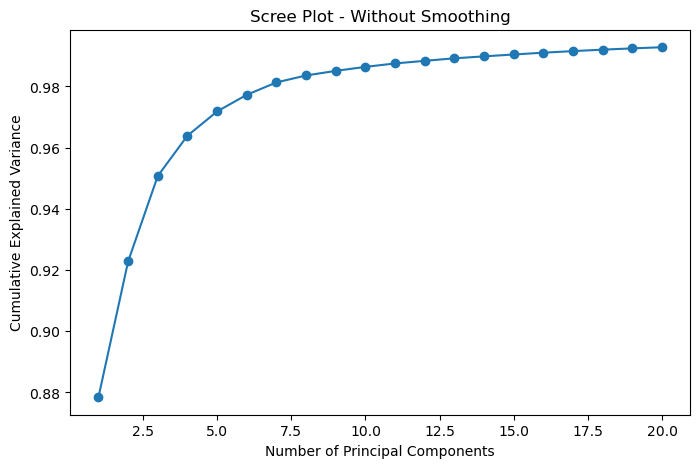

In [27]:
n_components = 20
fpca = FPCA(n_components=n_components)
fpca.fit(fd)

var_ratio = fpca.explained_variance_ratio_
cum_var_ratio = np.cumsum(var_ratio)

print("Explained variance ratio by component:", var_ratio)
print("Cumulative variance ratio:", cum_var_ratio)

plt.figure(figsize=(8, 5))
plt.plot(range(1, n_components+1), cum_var_ratio, marker='o')
plt.title("Scree Plot - Without Smoothing")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.savefig('scree_original.png')
plt.show()

We can immediately see that without smoothing - we would need to get a lot of PC's to get the same explained variance. Based on this screeplot, to get the same amount of explained variance - `0.98949278`, we would need more than 10 PC's. This is because smoothing gets rid of a lot noise and makes catching patterns much easier. This is one of the main reasons why smoothing is so good.